# Parameter mapping sonification of three different datasets

For this project, I am using a Python wrapper for SuperCollider named SC (https://github.com/enrike/sc). The data used for the sonification is from the world bank api, and represents the military spending as a percentage of the GDP for China, the Russian Federation and the US for the years 1999 to 2014.

In [1]:
%pylab inline
from IPython.display import HTML # for code hiding and soundcloud embedding
from __future__ import print_function
import urllib2
import json
import sc # wrapper for SuperCollider
import time # for scheduling

Populating the interactive namespace from numpy and matplotlib


In [2]:
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Data query from World Bank api 

According to the slightly questionable http://www.globalfirepower.com/countries-listing.asp, the US, Russia and China are the most powerful nations in terms of military power. How does their military spending as a percentage of their GDP compare?

In [3]:
prefix = 'http://api.worldbank.org'

countries = '/countries/cn;ru;us'

times = '?date=1999:2014'

parameters = '/indicators/MS.MIL.XPND.GD.ZS'

limit = '?per_page=48'

jsonKey = '&format=json'

f = urllib2.urlopen(prefix + countries + parameters + times + jsonKey)
queryData = f.read()
jsonData = json.loads(queryData)

copy query data into lists

In [4]:
cnData = []
ruData = []
usData = []
for i in jsonData[1]:
    valueString = str(i['value'])
    if valueString == 'None':
        thisValue = 0
    else:
        thisValue = float(str(i['value']))
    if i['country']['value'] == 'China':
        cnData.append(thisValue)
    elif i['country']['value'] == 'Russian Federation':
        ruData.append(thisValue)
    elif i['country']['value'] == 'United States':
        usData.append(thisValue)

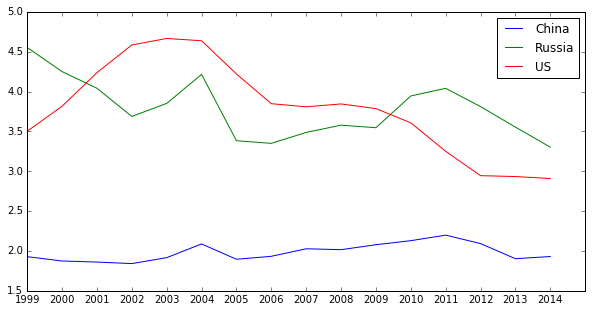

In [5]:
figure(figsize(10,5))
plot(cnData, label='China')
plot(ruData, label='Russia')
plot(usData, label='US')
legend(loc='upper right')
x = xticks(arange(16), arange(1999,2015))

determine min and max values, and map frequency and amplitude values accordingly

In [6]:
maxVal = max( max(usData), max(ruData), max(cnData))
minVal = min( min(usData), min(ruData), min(cnData))

In [7]:
minFreq = 200
maxFreq = 2000

cnFreqs = []
ruFreqs = []
usFreqs = []

cnAmps = []
ruAmps = []
usAmps = []

for i in cnData:
    cnFreqs.append(((i - minVal) / (maxVal - minVal)) * (maxFreq - minFreq) + minFreq)
    cnAmps.append(i/maxVal)
for i in ruData:
    ruFreqs.append(((i - minVal) / (maxVal - minVal)) * (maxFreq - minFreq) + minFreq)
    ruAmps.append(i/maxVal)
for i in usData:
    usFreqs.append(((i - minVal) / (maxVal - minVal)) * (maxFreq - minFreq) + minFreq)
    usAmps.append(i/maxVal)

## The SuperCollider wrapper

The wrapper only addresses scsynth, and not sclang. scsynth is usually located inside the SuperCollider application package. The wrapper can then access SynthDefs that are stored as .scsyndef files in a folder named 'synthdefs' that is located in the same directory as the pyhton file.
The SynthDef used for this project is named 'HW2' and looks like this:

##### (
##### SynthDef(\HW2, {
#####   | amp = 0.5, freq = 220, pan = 0 |
#####   var sig = SinOsc.ar(freq, 0, amp);
#####   Out.ar(0, Pan2.ar(sig, pan, 1.0));
##### }).store
##### )

Set the location of scsynth and start the server. 

In [8]:
# #SC Code:

# scDir = '/Applications/SuperCollider/SuperCollider.app/Contents/Resources/'
# sc.start( exedir=scDir, verbose=0, spew=0, startscsynth=1, port=57110 )

##### Create 3 instances of the HW2 synth, one for each country. In this first example, only the frequency of the sine oscillator is affected by the data. In the stereo image, China is on the left, Russia in the center and the US on the right. Each sound file loops through the data set for about 20 seconds at 4, 10 and 20 notes per second.

In [9]:
# # SC Code:

# dur = 20
# timeout = time.time() + dur
# dataRate = [4.0, 10.0, 20.0]

# sCn = sc.Synth( "HW2" )
# sRu = sc.Synth( "HW2" )
# sUs = sc.Synth( "HW2" )

# ampScaler = 0.75
# x = 0
# while time.time() < timeout:
#     time.sleep(1.0/20)
#     sCn.freq = cnFreqs[x]
#     sCn.amp = ampScaler
#     sCn.pan = -1
#     sRu.freq = ruFreqs[x]
#     sRu.amp = ampScaler
#     sRu.pan = 0
#     sUs.freq = usFreqs[x]
#     sUs.amp = ampScaler
#     sUs.pan = 1
#     x += 1
#     if x >= len(cnFreqs):
#         x -= len(cnFreqs)
    
# sCn.free()
# sRu.free()
# sUs.free()

In [10]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259964754&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [11]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965054&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [12]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965114&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

##### Map data to frequency, as well as amplitude. Panning is the same as in the previous example.

In [13]:
# # SC code:

# sCn = sc.Synth( "HW2" )
# sRu = sc.Synth( "HW2" )
# sUs = sc.Synth( "HW2" )

# ampScaler = 0.75
# x = 0
# while time.time() < timeout:
#     time.sleep(1.0/20)
#     sCn.freq = cnFreqs[x]
#     sCn.amp = cnAmps[x]
#     sCn.pan = -1
#     sRu.freq = ruFreqs[x]
#     sRu.amp = ruAmps[x]
#     sRu.pan = 0
#     sUs.freq = usFreqs[x]
#     sUs.amp = usAmps[x]
#     sUs.pan = 1
#     x += 1
#     if x >= len(cnFreqs):
#         x -= len(cnFreqs)
    
# sCn.free()
# sRu.free()
# sUs.free()

In [14]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965154&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [15]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965225&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [16]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965188&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

##### Map data to amplitude and panning (low values left, high values right). The frequency for each country stays the same (China: 670Hz, Russia: 432Hz, US: 1200 Hz)

In [17]:
# #SC code:

# sCn = sc.Synth( "HW2" )
# sRu = sc.Synth( "HW2" )
# sUs = sc.Synth( "HW2" )

# x = 0
# while time.time() < timeout:
#     time.sleep(1.0/10)
#     sCn.freq = 670
#     sCn.amp = cnAmps[x]
#     sCn.pan = (cnAmps[x]*2) - 1
#     sRu.freq = 432
#     sRu.amp = ruAmps[x]
#     sRu.pan = (ruAmps[x]*2) - 1
#     sUs.freq = 1200
#     sUs.amp = usAmps[x]
#     sUs.pan = (usAmps[x]*2) - 1
#     x += 1
#     if x >= len(cnFreqs):
#         x -= len(cnFreqs)
    
# sCn.free()
# sRu.free()
# sUs.free()

In [18]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965386&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [19]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965556&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [20]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965584&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

##### Map data to frequency, amplitude and panning.

In [21]:
# # SC code:

# sCn = sc.Synth( "HW2" )
# sRu = sc.Synth( "HW2" )
# sUs = sc.Synth( "HW2" )

# x = 0
# while time.time() < timeout:
#     time.sleep(1.0/20)
#     sCn.freq = cnFreqs[x]
#     sCn.amp = cnAmps[x]
#     sCn.pan = (cnAmps[x]*2) - 1
#     sRu.freq = ruFreqs[x]
#     sRu.amp = ruAmps[x]
#     sRu.pan = (ruAmps[x]*2) - 1
#     sUs.freq = usFreqs[x]
#     sUs.amp = usAmps[x]
#     sUs.pan = (usAmps[x]*2) - 1
#     x += 1
#     if x >= len(cnFreqs):
#         x -= len(cnFreqs)
    
# sCn.free()
# sRu.free()
# sUs.free()

In [22]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965294&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [23]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965317&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [24]:
h5 = HTML("""<iframe width="30%" height="100" scrolling="no" frameborder="no" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/259965359&amp;auto_play=false&amp;hide_related=true&amp;show_comments=false&amp;show_userfalse&amp;show_reposts=false&amp;visual=true"></iframe>""")
display(h5)

In [25]:
# sc.quit() # quit SuperCollider server

## Observations:

The mapping of the data to frequency yields the most convincing and detailed representation of the data. That being said, at different speeds panning and amplitude are able to convey some important characteristics. In order for the data to be mapped to spatial parameters, the frequency has to remain constant for each data set (as in the panning and amplitude examples). When all 3 parameters take in the data, the distinction between the data sets becomes very diffcult.

### Notes:

The recordings have been made through running the audio output of the browser into a DAW via SoundFlower.